<a href="https://colab.research.google.com/github/asrivastava0601/TechnoPulse_Competition/blob/master/TechnoPulse_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import AvgPool2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import hashlib
from hashlib import md5
import os
import random
import shutil as sh

In [0]:
df1 = pd.read_csv("/content/gdrive/My Drive/Challenge/Trainingcopy.csv")

df1.head()

,file,label
0,1,0
1,2,2
2,3,3
3,4,4
4,5,0


In [0]:
df1['path1'] = 'Image-'

df1['jpg'] = '.jpg'

df1['Image'] =  df1['path1'] + df1['file'].astype(str) + df1['jpg']
df1 = df1.drop(['file','path1','jpg'], axis = 1)

df1 = df1[['Image','label']]

df1.head()

,Image,label
0,Image-1.jpg,0
1,Image-2.jpg,2
2,Image-3.jpg,3
3,Image-4.jpg,4
4,Image-5.jpg,0


In [0]:
label_count = df1.groupby('label')['Image'].nunique()

print("Class label and Image count\n",label_count)

Class label and Image count
 label
0     892
1     976
2    1044
3    1101
4    1206
Name: Image, dtype: int64


In [0]:
os.getcwd()

'/content'

In [0]:
os.getcwd()
os.chdir("/content/gdrive/My Drive/Challenge/Training_Images")
os.getcwd()

'/content/gdrive/My Drive/Challenge/Training_Images'

In [0]:
####### Identify duplicate images using the hash keys ##########

file_list = os.listdir()
print("Number of files to read: ", len(file_list))

#original_fname = []          #uncomment to know the original file_name read and the correspoinding index.

#duplicates = []              #uncomment to know the duplicate image index and original image index.

duplicate_fname = []

hash_keys =dict()             # Dictionary to hold hash values as Keys and index as Values for a file.

from tqdm import tqdm

for index, filename in tqdm(enumerate(os.listdir(".")), total = len(file_list)):
#    original_fname.append((index,filename))                #uncomment to know the original file_name read and the correspoinding index.
    if os.path.isfile(filename):
        with open(filename,'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys:
            hash_keys[filehash] = index 
        else:
            duplicate_fname.append(filename)
            #print("Duplicate file:",filename)
            #duplicates.append((index,hash_keys[filehash]))  #uncomment to know the duplicate image index and original image index.

  0%|          | 1/5219 [00:00<13:37,  6.38it/s]

number of files to read:  5219


100%|██████████| 5219/5219 [22:42<00:00,  3.83it/s]


In [0]:
print("Number of duplicate images found:",len(duplicate_fname))

Number of duplicate images found: 551


In [0]:
###### Creating a copy of the orginal training images ######
from distutils.dir_util import copy_tree

# os.mkdir("/content/gdrive/My Drive/Challenge/Training_Images_copy")

fromDirectory = "/content/gdrive/My Drive/Challenge/Training_Images"
toDirectory = "/content/gdrive/My Drive/Challenge/Training_Images_copy"

copy_tree(fromDirectory,toDirectory)

print("Files copied:",len(os.listdir("/content/gdrive/My Drive/Challenge/Training_Images_copy")))

Files copied: 5219


In [0]:
####### Remove Duplcaites image files from the folder #######

source_path = "/content/gdrive/My Drive/Challenge/Training_Images_copy/"

j=0

while j < len(duplicate_fname):
    os.remove(source_path + duplicate_fname[j])
    j = j +1 

print("Non-Duplciate files remaining for training: ",len(os.listdir(source_path)))

Non-Duplciate files remaining for training:  4668


In [0]:
###### Change of working directory #######
os.chdir("/content/gdrive/My Drive/Challenge")

In [0]:
########### Remove duplicate entries from label dataframe ########

new_df = df1[~df1.Image.isin(duplicate_fname)]


In [0]:
print("Non-Duplciate entries in the label set file: ",len(new_df))

Non-Duplciate entries in the label set file:  4668


In [0]:
########### New DIRs for the class label vise data #########

os.mkdir('/content/gdrive/My Drive/Challenge/Training_Set')
os.mkdir('/content/gdrive/My Drive/Challenge/Training_Set/class0')
os.mkdir('/content/gdrive/My Drive/Challenge/Training_Set/class1')
os.mkdir('/content/gdrive/My Drive/Challenge/Training_Set/class2')
os.mkdir('/content/gdrive/My Drive/Challenge/Training_Set/class3')
os.mkdir('/content/gdrive/My Drive/Challenge/Training_Set/class4')

os.mkdir('/content/gdrive/My Drive/Challenge/Validation_Set')
os.mkdir('/content/gdrive/My Drive/Challenge/Validation_Set/class0')
os.mkdir('/content/gdrive/My Drive/Challenge/Validation_Set/class1')
os.mkdir('/content/gdrive/My Drive/Challenge/Validation_Set/class2')
os.mkdir('/content/gdrive/My Drive/Challenge/Validation_Set/class3')
os.mkdir('/content/gdrive/My Drive/Challenge/Validation_Set/class4')

In [0]:
######### Extract image file names for each label ########

image_class0_df = new_df[new_df.label ==0]
image_class1_df = new_df[new_df.label ==1]
image_class2_df = new_df[new_df.label ==2]
image_class3_df = new_df[new_df.label ==3]
image_class4_df = new_df[new_df.label ==4]


image_class0_list = image_class0_df['Image'].to_list()
image_class1_list = image_class1_df['Image'].to_list()
image_class2_list = image_class2_df['Image'].to_list()
image_class3_list = image_class3_df['Image'].to_list()
image_class4_list = image_class4_df['Image'].to_list()

In [0]:
########### Splitting the data for training and validation sets ###########



def split_image_files(source_dir, image_list, training_dir, validation_dir, split_size):

    training_set_length = int(len(image_list) * split_size)
    validation_set_length = int(len(image_list) - training_set_length)

    random.sample(image_list,len(image_list))
    
    training_set = image_list[0:training_set_length]
    validation_set = image_list[-validation_set_length:]
    
    random.sample(image_list,len(image_list))
    
    for file_name in training_set:
        temp_training_set = source_dir + file_name
        final_training_set = training_dir + file_name
        sh.copyfile(temp_training_set,final_training_set)
        
    for file_name in validation_set:
        temp_validation_set = source_dir + file_name
        final_validation_set = validation_dir + file_name
        sh.copyfile(temp_validation_set,final_validation_set)


source_dir = '/content/gdrive/My Drive/Challenge/Training_Images/'

class0_training_dir = '/content/gdrive/My Drive/Challenge/Training_Set/class0/'
class1_training_dir = '/content/gdrive/My Drive/Challenge/Training_Set/class1/'
class2_training_dir = '/content/gdrive/My Drive/Challenge/Training_Set/class2/'
class3_training_dir = '/content/gdrive/My Drive/Challenge/Training_Set/class3/'
class4_training_dir = '/content/gdrive/My Drive/Challenge/Training_Set/class4/'

class0_validation_dir = '/content/gdrive/My Drive/Challenge/Validation_Set/class0/'
class1_validation_dir = '/content/gdrive/My Drive/Challenge/Validation_Set/class1/'
class2_validation_dir = '/content/gdrive/My Drive/Challenge/Validation_Set/class2/'
class3_validation_dir = '/content/gdrive/My Drive/Challenge/Validation_Set/class3/'
class4_validation_dir = '/content/gdrive/My Drive/Challenge/Validation_Set/class4/'

split_size = 0.8 ### 80% of data for training and 20% for validation.


split_image_files(source_dir,image_class0_list,class0_training_dir,class0_validation_dir,split_size)
split_image_files(source_dir,image_class1_list,class1_training_dir,class1_validation_dir,split_size)
split_image_files(source_dir,image_class2_list,class2_training_dir,class2_validation_dir,split_size)
split_image_files(source_dir,image_class3_list,class3_training_dir,class3_validation_dir,split_size)
split_image_files(source_dir,image_class4_list,class4_training_dir,class4_validation_dir,split_size)


total_validation_file = len(os.listdir('/content/gdrive/My Drive/Challenge/Validation_Set/class0')) + len(os.listdir('/content/gdrive/My Drive/Challenge/Validation_Set/class1')) + len(os.listdir('/content/gdrive/My Drive/Challenge/Validation_Set/class2')) + len(os.listdir('/content/gdrive/My Drive/Challenge/Validation_Set/class3')) + len(os.listdir('/content/gdrive/My Drive/Challenge/Validation_Set/class4'))


In [0]:
###### Check if the images are distributed ########
for i in range(0,5):
    print("Number of training images for class",i," :",len(os.listdir('/content/gdrive/My Drive/Challenge/Training_Set/class'+str(i)+'/')))
    print("Number of validation images for class",i," :",len(os.listdir('/content/gdrive/My Drive/Challenge/Validation_Set/class'+str(i)+'/')))

Number of training images for class 0  : 634
Number of validation images for class 0  : 159
Number of training images for class 1  : 684
Number of validation images for class 1  : 172
Number of training images for class 2  : 744
Number of validation images for class 2  : 186
Number of training images for class 3  : 789
Number of validation images for class 3  : 198
Number of training images for class 4  : 881
Number of validation images for class 4  : 221


In [0]:
######## Model ################

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 15, 15, 64)      

In [0]:

######## Creating the generator for input to the model #########

bs = 32 # batch size

TRAINING_DIR = "/content/gdrive/My Drive/Challenge/Training_Set"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  #  rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                    # horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=bs, 
                                                    class_mode='categorical', 
                                                    target_size=(150, 150))


VALIDATION_DIR = "/content/gdrive/My Drive/Challenge/Validation_Set"
validation_datagen = ImageDataGenerator(rescale=1.0/255)
#                                    rotation_range=40,
# #                                    width_shift_range=0.2,
# #                                    height_shift_range=0.2,
# #                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=False,
#                                    fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                    batch_size=bs, 
                                                    class_mode='categorical', 
                                                    target_size=(150, 150))

Found 3732 images belonging to 5 classes.
Found 936 images belonging to 5 classes.


In [0]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              verbose=1,
#                             steps_per_epoch = 100,
                              validation_data=validation_generator,
                             validation_steps = 50)

Epoch 1/100
117/117 [==============================] - 57s 484ms/step - loss: 1.5922 - accuracy: 0.2398 - val_loss: 1.5530 - val_accuracy: 0.2919
Epoch 2/100
117/117 [==============================] - 52s 446ms/step - loss: 1.5287 - accuracy: 0.2974 - val_loss: 1.5290 - val_accuracy: 0.3009
Epoch 3/100
117/117 [==============================] - 52s 446ms/step - loss: 1.5014 - accuracy: 0.3100 - val_loss: 1.5370 - val_accuracy: 0.3151
Epoch 4/100
117/117 [==============================] - 52s 446ms/step - loss: 1.4888 - accuracy: 0.3205 - val_loss: 1.5691 - val_accuracy: 0.3160
Epoch 5/100
117/117 [==============================] - 53s 451ms/step - loss: 1.4887 - accuracy: 0.3223 - val_loss: 1.5642 - val_accuracy: 0.3718
Epoch 6/100
117/117 [==============================] - 52s 446ms/step - loss: 1.4729 - accuracy: 0.3191 - val_loss: 1.7116 - val_accuracy: 0.3756
Epoch 7/100
117/117 [==============================] - 52s 447ms/step - loss: 1.4669 - accuracy: 0.3298 - val_loss: 1.4519 -

In [0]:
######### Graph - Training vs Validation accuracy per epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Training vs Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

NameError: ignored

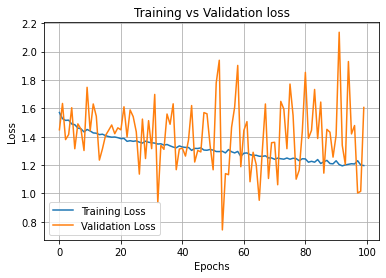

In [0]:
########## Graph - Training vs Validation loss per epoch
plt.plot(history.history['loss'], label = "Training Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.title('Training vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='lower left')

In [0]:
####### Confusion Matrix #########

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


Y_pred = model.predict_generator(validation_generator, total_validation_file // bs+1)

y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(validation_generator.classes, y_pred)



In [0]:
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(cm)
# plt.title('Confusion matrix of the classifier\n')
# fig.colorbar(cax)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

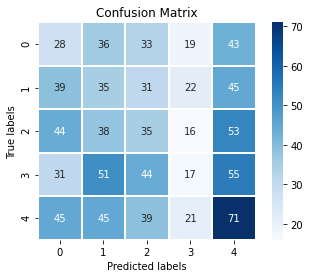

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, square = True, cmap="Blues" , linecolor= "white", linewidths= '1');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [0]:
class_labels = ['class_0', 'class_1', 'class_2','class_3','class_4']
clasy_rep= classification_report(validation_generator.classes, y_pred, target_names= class_labels)

print('Classification Report:\n')
print(clasy_rep)

Classification Report:

              precision    recall  f1-score   support

     class_0       0.15      0.18      0.16       159
     class_1       0.17      0.20      0.19       172
     class_2       0.19      0.19      0.19       186
     class_3       0.18      0.09      0.12       198
     class_4       0.27      0.32      0.29       221

    accuracy                           0.20       936
   macro avg       0.19      0.19      0.19       936
weighted avg       0.20      0.20      0.19       936

